In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel('glass.xlsx', sheet_name='glass')
df

RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]

In [ ]:
# Check for missing values
print(df.isnull().sum())

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [ ]:
# Statistical summary
print(df.describe())

               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000    1

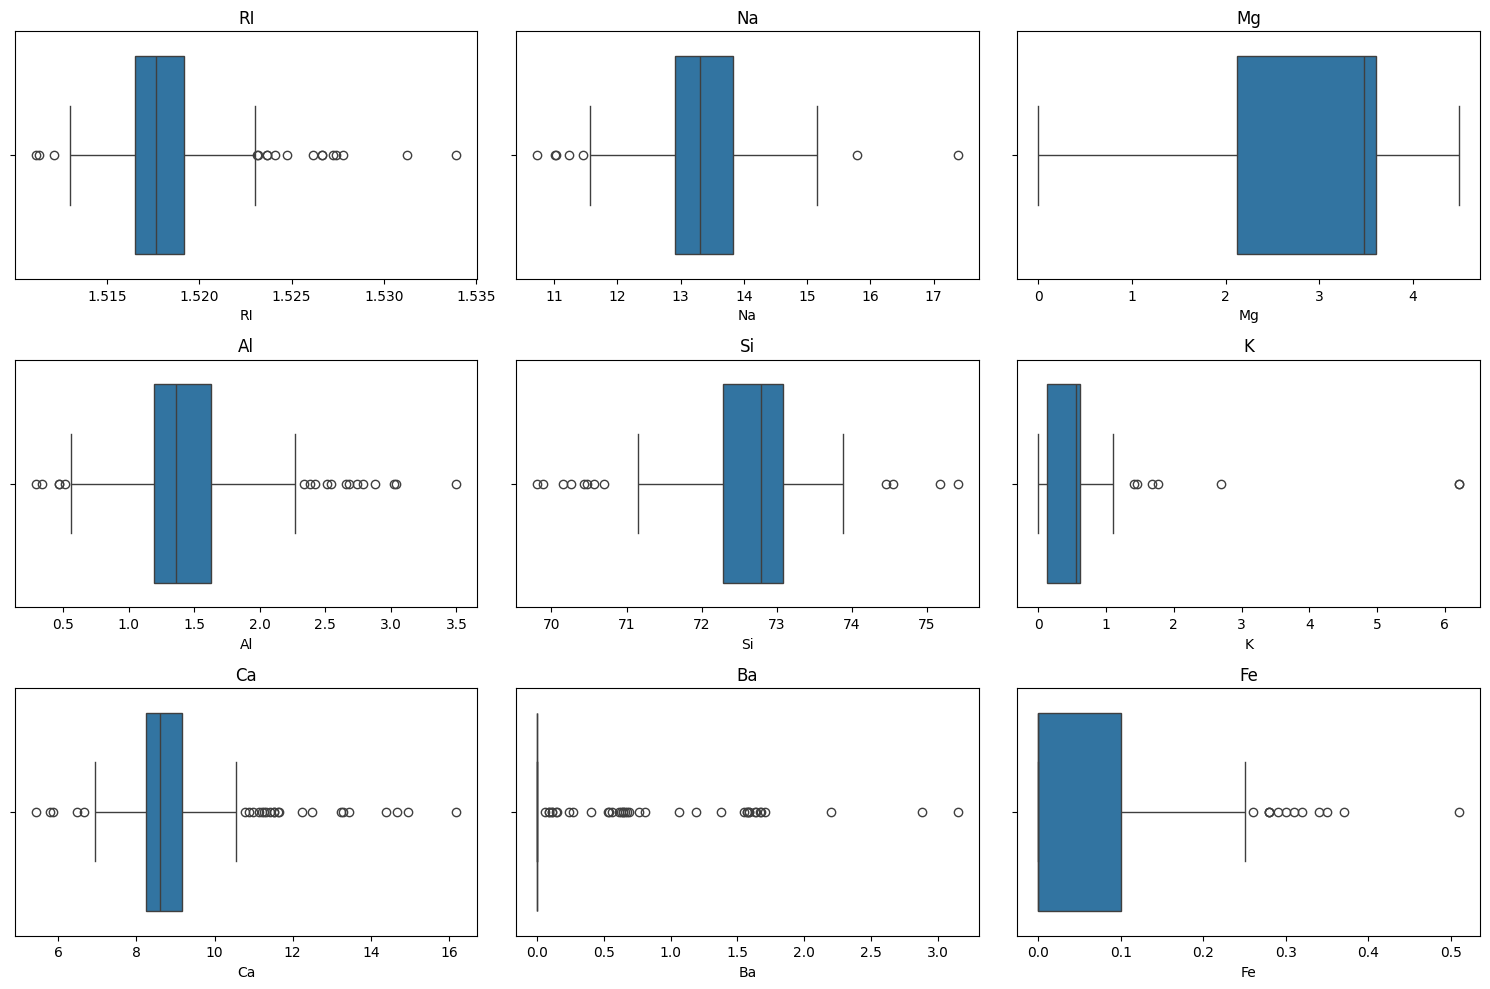

In [ ]:
# Visualizing distributions
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

### From the boxplots, we can observe:


* Features like Ba and Fe have many zeros and some extreme values

* K (Potassium) has several outliers

* Most features show some degree of skewness

In [ ]:
# Check class distribution
print(df['Type'].value_counts())

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64


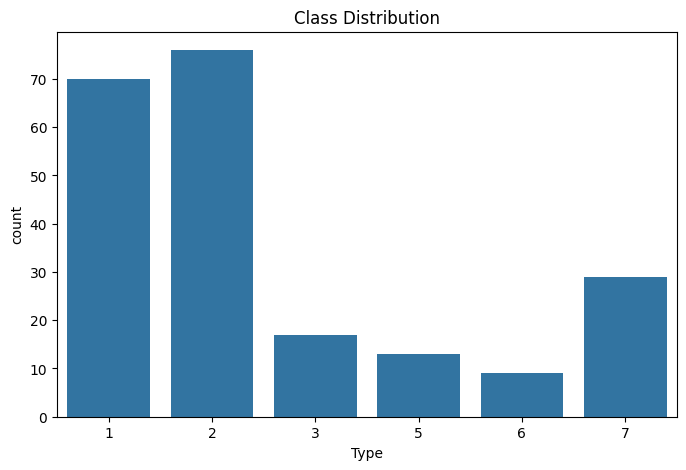

In [ ]:
# Visualize class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Type', data=df)
plt.title('Class Distribution')
plt.show()

## **Data Visualization**

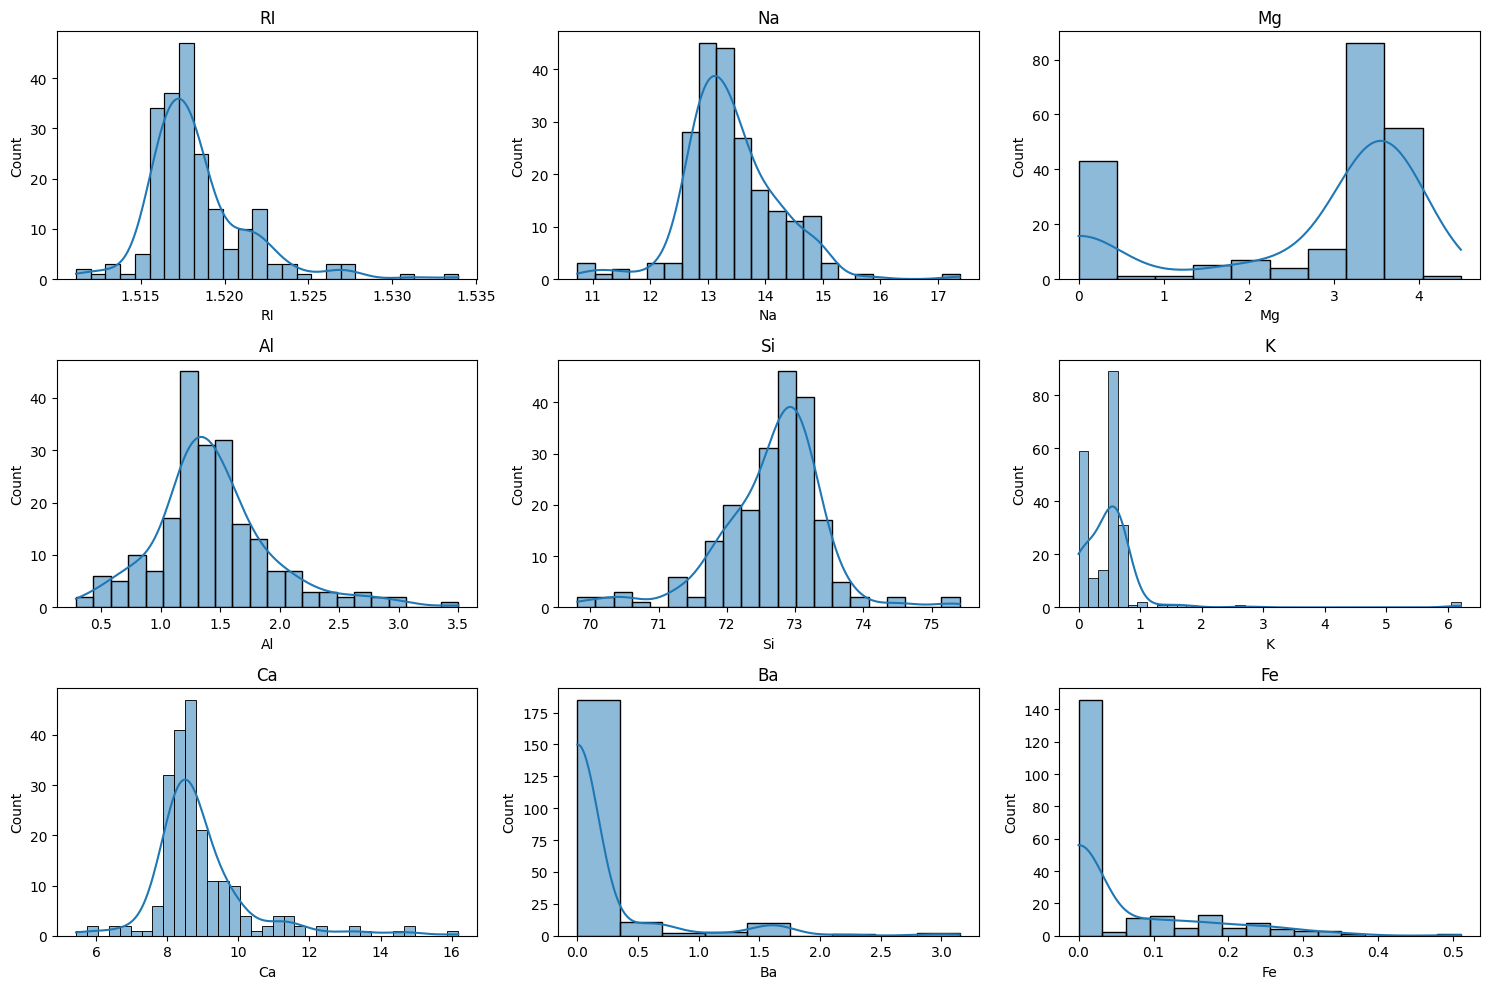

In [ ]:
# Histograms of all features
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

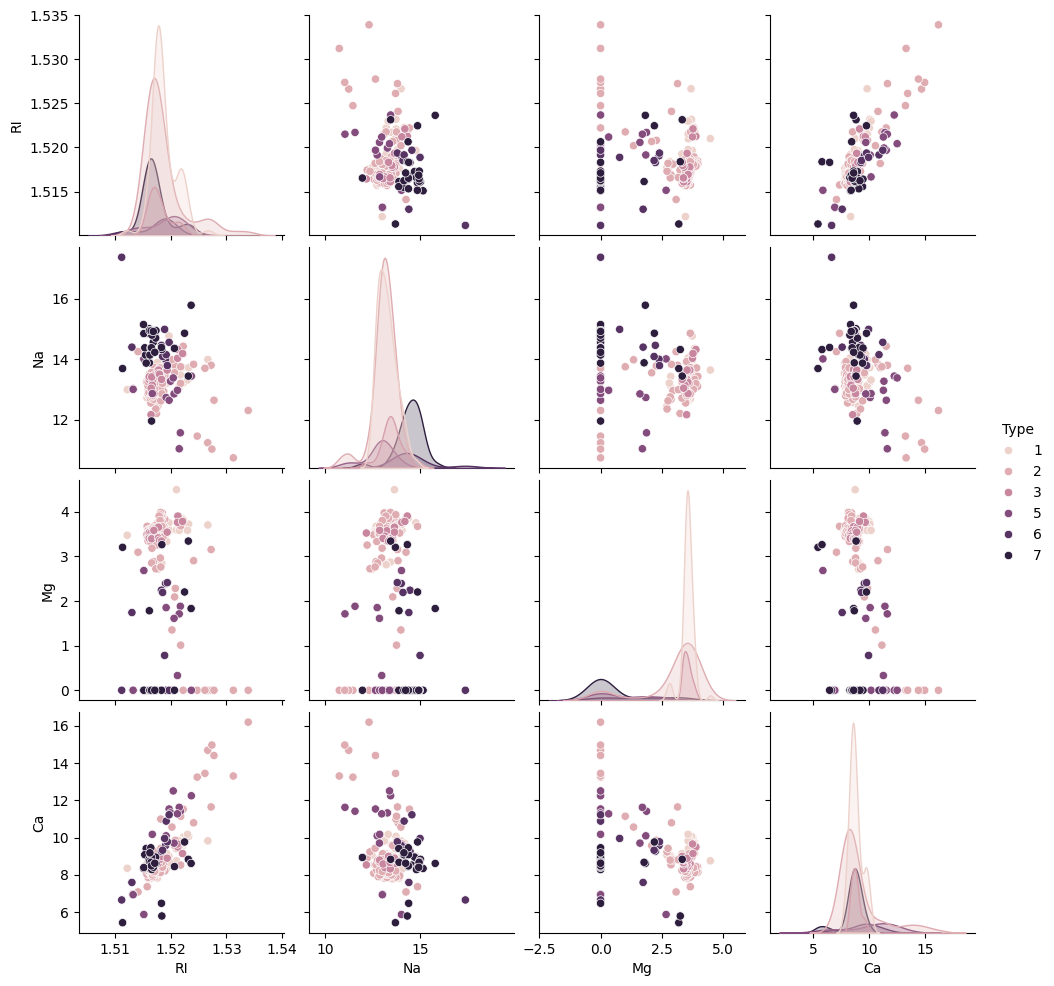

In [ ]:
# Pair plots for selected features
sns.pairplot(df[['RI', 'Na', 'Mg', 'Ca', 'Type']], hue='Type')
plt.show()

In [ ]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## **Data Preprocessing**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop('Type', axis=1)
y = df['Type']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Check new class distribution
print(pd.Series(y_resampled).value_counts())

Type
1    76
2    76
3    76
5    76
6    76
7    76
Name: count, dtype: int64


## **Random Forest Model Implementation**

In [ ]:
from sklearn.model_selection import train_test_split

# Split the resampled data
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9239130434782609

Classification Report:
               precision    recall  f1-score   support

           1       0.87      0.76      0.81        17
           2       0.85      0.89      0.87        19
           3       0.83      1.00      0.91        10
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        14
           7       1.00      0.94      0.97        18

    accuracy                           0.92        92
   macro avg       0.93      0.93      0.93        92
weighted avg       0.93      0.92      0.92        92


Confusion Matrix:
 [[13  2  2  0  0  0]
 [ 2 17  0  0  0  0]
 [ 0  0 10  0  0  0]
 [ 0  0  0 14  0  0]
 [ 0  0  0  0 14  0]
 [ 0  1  0  0  0 17]]


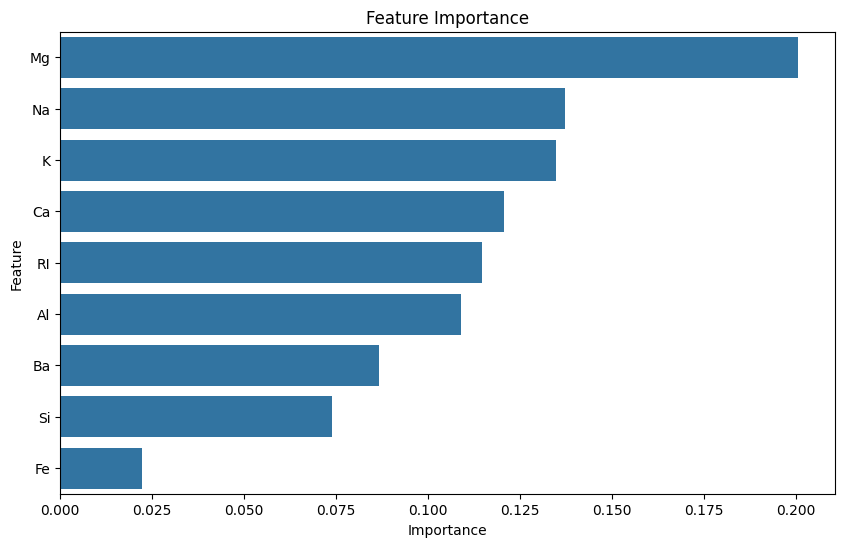

In [ ]:
# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

## **Bagging and Boosting Methods**

In [ ]:
# prompt: # Bagging Classifier

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Bagging Classifier
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging.fit(X_train, y_train)
y_pred_bagging = bagging.predict(X_test)

print("\nBagging Classifier Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_bagging))
print("\nClassification Report:\n",
      classification_report(y_test, y_pred_bagging))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_bagging))


Bagging Classifier Evaluation:
Accuracy: 0.9347826086956522

Classification Report:
               precision    recall  f1-score   support

           1       0.88      0.82      0.85        17
           2       0.89      0.89      0.89        19
           3       0.83      1.00      0.91        10
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        14
           7       1.00      0.94      0.97        18

    accuracy                           0.93        92
   macro avg       0.93      0.94      0.94        92
weighted avg       0.94      0.93      0.93        92


Confusion Matrix:
 [[14  1  2  0  0  0]
 [ 2 17  0  0  0  0]
 [ 0  0 10  0  0  0]
 [ 0  0  0 14  0  0]
 [ 0  0  0  0 14  0]
 [ 0  1  0  0  0 17]]


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# AdaBoost Classifier
adaboost = AdaBoostClassifier(
    n_estimators=100,
    random_state=42
)
adaboost.fit(X_train, y_train)
y_pred_boost = adaboost.predict(X_test)

print("\nAdaBoost Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_boost))
print(classification_report(y_test, y_pred_boost))


AdaBoost Classifier Performance:
Accuracy: 0.532608695652174
              precision    recall  f1-score   support

           1       0.35      0.82      0.49        17
           2       0.07      0.05      0.06        19
           3       0.60      0.30      0.40        10
           5       0.00      0.00      0.00        14
           6       1.00      1.00      1.00        14
           7       0.89      0.94      0.92        18

    accuracy                           0.53        92
   macro avg       0.49      0.52      0.48        92
weighted avg       0.47      0.53      0.48        92



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting Classifier
gb = GradientBoostingClassifier(
    n_estimators=100,
    random_state=42
)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print("\nGradient Boosting Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Performance:
Accuracy: 0.9456521739130435
              precision    recall  f1-score   support

           1       0.88      0.82      0.85        17
           2       1.00      0.89      0.94        19
           3       0.77      1.00      0.87        10
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        18

    accuracy                           0.95        92
   macro avg       0.94      0.95      0.94        92
weighted avg       0.95      0.95      0.95        92



**Bagging **(Bootstrap Aggregating) and Boosting are both ensemble learning methods used to improve the performance of machine learning models by combining multiple models.

**Bagging builds** multiple independent models (usually of the same type) on different subsets of the training data (sampled with replacement) and aggregates their predictions (e.g., by voting or averaging) to reduce variance and prevent overfitting.

**Boosting builds** models sequentially, where each new model focuses on correcting the errors made by the previous ones. It reduces bias and variance by giving more weight to misclassified instances.

**Difference:**

Bagging trains models in parallel, while Boosting trains models sequentially.

Bagging reduces variance, Boosting reduces bias and variance.

To handle imbalanced data, where one class significantly outnumbers the other(s), you can use the following techniques:

**Resampling Methods:**

Oversampling the minority class (e.g., using SMOTE – Synthetic Minority Over-sampling Technique).

Undersampling the majority class to balance the dataset.

**Use of Appropriate Evaluation Metrics:**

Instead of accuracy, use metrics like Precision, Recall, F1-Score, or ROC-AUC to evaluate performance.

**Class Weights:**

Assign higher weights to the minority class in algorithms (many models like Logistic Regression, SVM, and tree-based models support this).

**Anomaly Detection Models:**

For extremely imbalanced data, treat the minority class as an anomaly or outlier.

**Ensemble Methods:**

Use ensemble methods like Balanced Random Forest or EasyEnsemble that are designed to handle imbalance.